In [5]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [7]:
location = pd.read_excel('/Users/raviswanath/Downloads/Network Planning Case Study - Opex Analytics.xlsx', 
                         sheetname = 'Inter-Customer distances')

In [8]:
location.head()

,Customer ID,Customer ID.1,Distance,condition
0,1,1,0.00,1
1,1,2,814.27,0
2,1,3,264.28,1
3,1,4,2677.21,0
4,1,5,1457.23,0


In [9]:
location.columns = ['FromID', 'ToID', 'Distance', 'condition']

In [10]:
location.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
FromID       2500 non-null int64
ToID         2500 non-null int64
Distance     2500 non-null float64
condition    2500 non-null int64
dtypes: float64(1), int64(3)
memory usage: 78.2 KB


In [11]:
 location[(location.FromID == 30) & (location.condition ==1)]

,FromID,ToID,Distance,condition
1454,30,5,364.44,1
1455,30,6,354.96,1
1463,30,14,451.12,1
1465,30,16,440.18,1
1466,30,17,440.18,1
1467,30,18,106.00,1
1479,30,30,0.00,1
1481,30,32,444.36,1
1483,30,34,354.31,1
1490,30,41,258.49,1


In [12]:
customers = pd.read_excel('/Users/raviswanath/Downloads/Network Planning Case Study - Opex Analytics.xlsx', 
                         sheetname = 'Customers')

In [13]:
lons = []
for i in customers.Longitude:
    lons.append(i)

lats = []
for j in customers.Latitude:
    lats.append(j)
    
ID = []
for k in customers.ID:
    ID.append(k)

In [14]:
#Plant locations
latp = [41.8781, 32.7767, 39.7392, 33.7490]
lonp = [-87.629798, -96.796988, -104.9903, -84.3880] 
locs = ['Chicago', 'Dallas', 'Denver', 'Atlanta']

In [15]:
my_map = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0= 36.8, lon_0=-96.05,
            llcrnrlon=-125.4, llcrnrlat= 24.4, urcrnrlon=-66.7, urcrnrlat=49.2)

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Cha

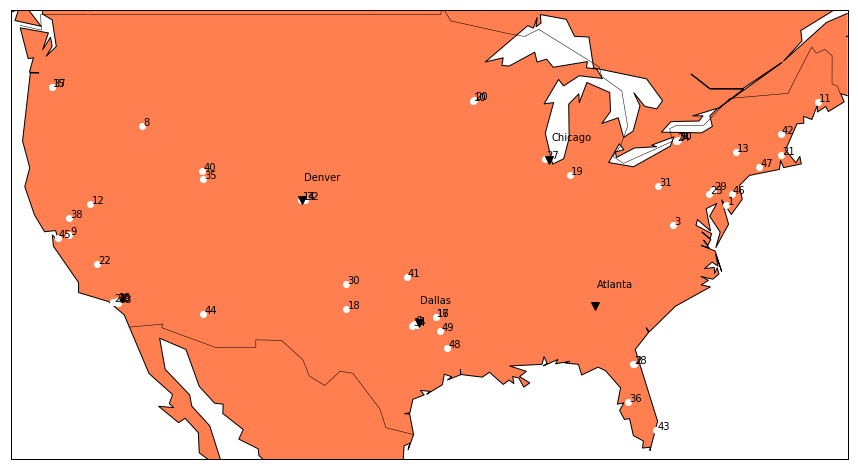

In [16]:
fig, ax = plt.subplots(figsize=(15,30))
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
#my_map.drawmeridians(np.arange(0, 360, 30))
#my_map.drawparallels(np.arange(-90, 90, 30))
x,y = my_map(lons, lats)
p,q = my_map(lonp, latp)
my_map.plot(x, y, 'bo', markersize=6, color = 'white')
my_map.plot(p, q, 'v', markersize = 8, color = 'black')


for label, xpt, ypt in zip(ID, x, y):
    plt.text(xpt + 10000, ypt + 5000, label)
for lab, ppt, qpt in zip(locs, p, q):
    plt.text(ppt + 15000, qpt + 150000, lab)
plt.show()

As it can be clearly seen from the map, the demand locations are clusterd majorly into 3. The North-East cluster, the Southern cluster and the West cluster. 

In [17]:
#using k means clustering to cluster the demand points into 4 different clusters.
from sklearn.cluster import KMeans

In [18]:
Y = np.matrix(list(zip(lons, lats)))
knn = KMeans(n_clusters = 5).fit(Y)

In [19]:
knn.labels_

array([1, 3, 1, 2, 0, 0, 1, 2, 2, 4, 1, 2, 1, 0, 2, 0, 0, 0, 4, 4, 1, 2, 1,
       1, 2, 2, 4, 3, 1, 0, 1, 0, 2, 0, 2, 3, 2, 2, 2, 2, 0, 1, 3, 2, 2, 1,
       1, 0, 0, 1], dtype=int32)

In [20]:
knn.cluster_centers_

array([[ -98.64778667,   34.28867283],
       [ -75.478428  ,   41.50384836],
       [-118.17360375,   38.12665825],
       [ -81.42874875,   28.735669  ],
       [ -90.00927925,   43.18061675]])

In [21]:
grp0 =[]; grp1 =[]; grp2 =[]; grp3 =[]; grp4=[]
for i in range(0,50):
    if(knn.labels_[i] == 0):
        grp0.append(i+1)
    elif(knn.labels_[i] == 1):
        grp1.append(i+1)
    elif(knn.labels_[i] == 2):
        grp2.append(i+1)
    elif(knn.labels_[i] == 3):
        grp3.append(i+1)
    else:
        grp4.append(i+1)

In [22]:
knn.cluster_centers_

array([[ -98.64778667,   34.28867283],
       [ -75.478428  ,   41.50384836],
       [-118.17360375,   38.12665825],
       [ -81.42874875,   28.735669  ],
       [ -90.00927925,   43.18061675]])

In [23]:
lonc = []; latc=[]
for i in range(0,5):
    lonc.append(knn.cluster_centers_[i,0])
for j in range(0,5):
    latc.append(knn.cluster_centers_[j, 1])

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Cha

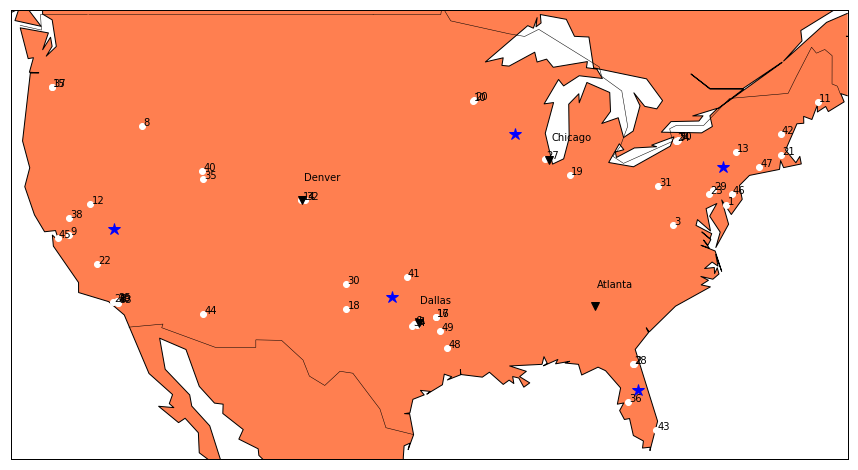

In [24]:
my_map = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0= 36.8, lon_0=-96.05,
            llcrnrlon=-125.4, llcrnrlat= 24.4, urcrnrlon=-66.7, urcrnrlat=49.2)

fig, ax = plt.subplots(figsize=(15,30))
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
#my_map.drawmeridians(np.arange(0, 360, 30))
#my_map.drawparallels(np.arange(-90, 90, 30))
x,y = my_map(lons, lats)
p,q = my_map(lonp, latp)
m,n = my_map(lonc, latc)
my_map.plot(x, y, 'bo', markersize=6, color = 'white')
my_map.plot(p, q, 'v', markersize = 8, color = 'black')
my_map.plot(m, n, '*', markersize = 12, color = 'blue')

for label, xpt, ypt in zip(ID, x, y):
    plt.text(xpt + 10000, ypt + 5000, label)
for lab, ppt, qpt in zip(locs, p, q):
    plt.text(ppt + 15000, qpt + 150000, lab)
plt.show()

In [25]:
annual_demand = pd.read_excel('/Users/raviswanath/Downloads/Network Planning Case Study - Opex Analytics.xlsx', 
                         sheetname = 'Annual Demand')

In [26]:
annual_demand.head()

,Customer ID,Product ID,Time Period,Demand (in tonnes),Revenue ($)
0,1,1,2012,4650.2820,1000
1,2,1,2012,10882.7040,1000
2,3,1,2012,7920.6825,1000
3,4,1,2012,2099.0628,1000
4,5,1,2012,4920.3160,1000


In [27]:
agg = annual_demand.groupby(['Customer ID', 'Product ID'])

In [28]:
x = agg.mean()

In [29]:
#Demand (by moving average) for 2015. 
demand2015 = x.unstack().drop(['Time Period', 'Revenue ($)'], axis = 1)

In [30]:
demand2015.head()

Demand (in tonnes)                                          
Product ID                   1          2          3         4         5
Customer ID                                                             
1                    4650.2820   528.1092   480.2600  307.3600   76.5160
2                   10882.7040  4183.8000   622.6675  474.3900  280.6182
3                    7920.6825   352.4472   131.0400    7.5649    5.0600
4                    2099.0628   366.3360    14.4495   11.7600    6.7512
5                    4920.3160  1961.7808  1299.7084  882.0302  281.4100

In [31]:
#Demand of each product
demand2015.columns

MultiIndex(levels=[['Time Period', 'Demand (in tonnes)', 'Revenue ($)'], [1, 2, 3, 4, 5]],
           labels=[[1, 1, 1, 1, 1], [0, 1, 2, 3, 4]],
           names=[None, 'Product ID'])

In [32]:
demand2015.isnull()

Demand (in tonnes)                            
Product ID                   1      2      3      4      5
Customer ID                                               
1                        False  False  False  False  False
2                        False  False  False  False  False
3                        False  False  False  False  False
4                        False  False  False  False  False
5                        False  False  False  False  False
6                        False  False  False  False  False
7                        False  False  False  False  False
8                        False  False  False  False  False
9                        False  False  False  False  False
10                       False  False  False  False  False
11                       False  False  False  False  False
12                       False  False  False  False  False
13                       False  False  False  False  False
14                       False  False  False  False  False
15                       False  False  False  False  False
16                       False  False  False  False  False
17                       False  False  False  False  False
18                       False  False  False  False  False
19                       False  False  False  False  False
20                       False  False  False  False  False
21                       False  False  False  False  False
22                       False  False  False  False  False
23                       False  False  False  False  False
24                       False  False  False  False  False
25                       False  False  False  False  False
26                       False  False  False  False  False
27                       False  False  False  False  False
28                       False  False  False  False  False
29                       False  False  False  False  False
30                       False  False  False  False  False
31                       False  False  False  False  False
32                       False  False  False  False  False
33                       False  False  False  False  False
34                       False  False  False  False  False
35                       False  False  False  False  False
36                       False  False  False  False  False
37                       False  False  False  False  False
38                       False  False  False  False  False
39                       False  False  False  False  False
40                       False  False  False  False  False
41                       False  False  False  False  False
42                       False  False  False  False  False
43                       False  False  False  False  False
44                       False  False  False  False  False
45                       False  False  False  False  False
46                       False  False  False  False  False
47                       False  False  False  False  False
48                       False  False  False  False  False
49                       False  False  False  False  False
50                       False  False  False  False  False

In [33]:
tots = []
for i in range(1,6):
    tots.append(demand2015['Demand (in tonnes)'][i].sum())

In [34]:
tots

[295488.7397999999,
 72580.14239999998,
 29797.44700000001,
 11922.090100000005,
 5940.2654999999995]

Requirement for product 1 ('Clear'), manufactured at Chicago is the most followed by products 2, 3, 4 and 5. Hence, the warehouses must be placed at locations that are closest from Chicago, then Dallas, followed by Denver and Atlanta.  

In [35]:
#Tons of load that should go from warehouses buitl within 500 miles
round(0.8*sum(tots))    

332583

In [36]:
#Function calculating the load requirement of a set of demand nodes
def loadcalc(list1):
    load = 0
    for i in list1:
        for j in range(1, 6):
            load = load + demand2015['Demand (in tonnes)'][j][i]
    return(load)

In [37]:
loadcalc([28, 36, 43])

8146.2059999999992

In [38]:
loadcalc([10, 20, 27, 19])

21874.649700000005

In [39]:
loadcalc([8, 15, 35, 37, 40]) 

64880.035000000011

The above two cells clearly indicate that demand points [8, 15, 35, 37, 40] clearly have a much higer demand requirement than [28, 36, 43] and [10, 20, 27, 19] combined. Hence, it would be wiser to remove the two prospective warehouse locations and place one on loaction ID 8.

In [40]:
lonc.pop(4); lonc.pop(3); latc.pop(4); latc.pop(3);

In [41]:
lonc.append(-116.219041); latc.append(43.580123); 

### Prospective warehouse locations.

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Cha

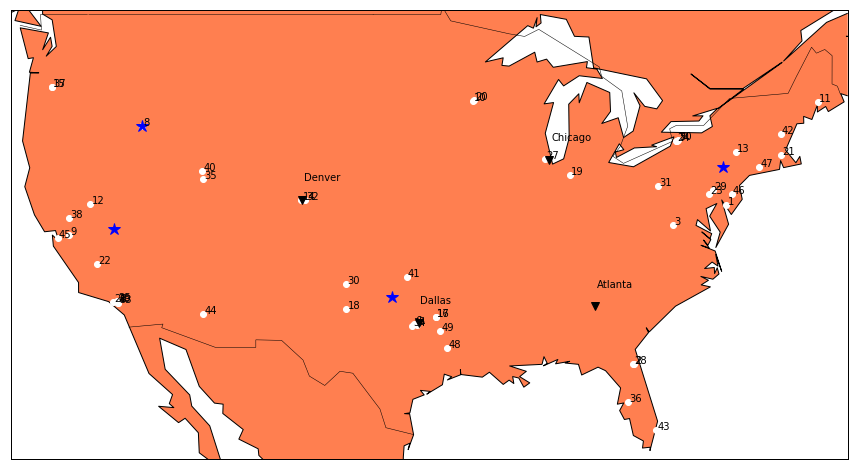

In [42]:
my_map = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0= 36.8, lon_0=-96.05,
            llcrnrlon=-125.4, llcrnrlat= 24.4, urcrnrlon=-66.7, urcrnrlat=49.2)

fig, ax = plt.subplots(figsize=(15,30))
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
#my_map.drawmeridians(np.arange(0, 360, 30))
#my_map.drawparallels(np.arange(-90, 90, 30))
x,y = my_map(lons, lats)
p,q = my_map(lonp, latp)
m,n = my_map(lonc, latc)
my_map.plot(x, y, 'bo', markersize=6, color = 'white')
my_map.plot(p, q, 'v', markersize = 8, color = 'black')
my_map.plot(m, n, '*', markersize = 12, color = 'blue')

for label, xpt, ypt in zip(ID, x, y):
    plt.text(xpt + 10000, ypt + 5000, label)
for lab, ppt, qpt in zip(locs, p, q):
    plt.text(ppt + 15000, qpt + 150000, lab)
plt.show()

In [43]:
grp0

[5, 6, 14, 16, 17, 18, 30, 32, 34, 41, 48, 49]

In [44]:
#place at 30
south_load = loadcalc([5, 6, 14, 16, 17, 18, 30, 32, 34, 41, 49])
south_load

99149.190200000055

In [45]:
#place at 13
grp1

[1, 3, 7, 11, 13, 21, 23, 24, 29, 31, 42, 46, 47, 50]

In [46]:
northeast_load = loadcalc([1, 3, 7, 11, 13, 21, 23, 24, 29, 31, 42, 46, 47, 50])
northeast_load

110303.8913

In [47]:
grp2

[4, 8, 9, 12, 15, 22, 25, 26, 33, 35, 37, 38, 39, 40, 44, 45]

In [48]:
#place at 22
westcost_load = loadcalc([4, 9, 12, 22, 25, 26, 33, 38, 39, 45])
westcost_load

88408.960099999982

In [49]:
#place at 8
northwest_load = loadcalc([8, 15, 35, 37, 40])
northwest_load

64880.035000000011

In [50]:
south_load + northeast_load + westcost_load + northwest_load

362742.07660000009

Which is greater than 332583 (80% of the total demand). Hence, a minimum of 4 warehouses would be required to achieve this (location of the warehouses subject to wary per the transportation cost associated)

---

In [51]:
def load_to_whouse(list1):
    load = 0
    for i in list1:
        load = load + demand2015['Demand (in tonnes)'][5][i]
    return(load)

In [52]:
load_to_whouse([5, 6, 14, 16, 17, 18, 30, 32, 34, 41, 49])

1846.4621999999997